# developer: Mohammad mehdi Sahraei


### importing libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [4]:
%cd /content

/content


In [5]:
%pwd

'/content'

### downloading dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OhaXBuHWLzwK4i1rCxMs")
project = rf.workspace("datasetyolov5-2k886").project("plate-alpha")
dataset = project.version(6).download("folder")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=8478db4bc00e92ef133624e9702c374f373671cef66ff8cb637f44227c8293ea
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to plate-alpha-6 in folder:: 100%|██████████| 2218/2218 [00:00<00:00, 3408.51it/s]


### setting dataset 

In [7]:
train_path = '/content/plate-alpha-6/train'
valid_path = '/content/plate-alpha-6/valid'
test_path = '/content/plate-alpha-6/test'

In [8]:
class_names = subdirs = ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine','43-anewfive']
num_classes = len(class_names)

In [9]:
print(len(class_names))

43


In [11]:
labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


### using as np.array & mnist digit format

In [12]:
train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

In [13]:

valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

test_images = np.array(valid_imgs)
test_labels = np.array(valid_labels)

### initial testing

3-p
2


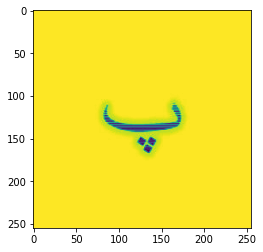

In [14]:
num=90
print(class_names[train_labels[num]])
print(train_labels[num])
plt.imshow(train_images[num])

In [18]:
test_labels

array([10, 15,  9, 16, 13, 21, 13, 19, 21, 11, 17, 13,  0, 14, 17,  9, 13,
       19, 13, 22, 10, 18, 13, 19, 13,  1,  1, 12, 21, 12, 12, 19, 18, 13,
       13, 18, 17, 16, 21, 16, 11, 16,  9, 22, 16, 14,  9, 22, 11, 18, 13,
       21, 15, 14, 15,  9, 13,  1, 17, 10,  1, 14, 19, 20, 20, 15, 10, 18,
       17, 17,  1, 17, 14, 17, 10,  9, 16,  0, 10, 19, 20, 11, 21, 22, 21,
       12,  9, 11,  1,  9, 14, 22, 10, 11,  1, 10, 19, 16,  9, 16, 19, 20,
       22, 11, 18, 16, 15, 11,  1])

### training model

In [16]:
#Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:

model = keras.Sequential([

    keras.layers.Dropout(0.12),
    keras.layers.BatchNormalization(),
    
    
    # Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into 
    # a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [ ]:
model.fit(train_images, train_labels, epochs=480)

Epoch 1/480
61/61 [==============================] - 3s 11ms/step - loss: 2.7787 - accuracy: 0.3576
Epoch 2/480
61/61 [==============================] - 1s 10ms/step - loss: 1.6754 - accuracy: 0.5763
Epoch 3/480
61/61 [==============================] - 1s 10ms/step - loss: 1.3865 - accuracy: 0.6169
Epoch 4/480
61/61 [==============================] - 1s 9ms/step - loss: 1.0762 - accuracy: 0.6939
Epoch 5/480
61/61 [==============================] - 1s 9ms/step - loss: 0.9704 - accuracy: 0.6996
Epoch 6/480
61/61 [==============================] - 1s 9ms/step - loss: 0.8383 - accuracy: 0.7314
Epoch 7/480
61/61 [==============================] - 1s 9ms/step - loss: 0.7383 - accuracy: 0.7611
Epoch 8/480
61/61 [==============================] - 1s 9ms/step - loss: 0.6534 - accuracy: 0.7944
Epoch 9/480
61/61 [==============================] - 1s 9ms/step - loss: 0.5938 - accuracy: 0.7923
Epoch 10/480
61/61 [==============================] - 1s 9ms/step - loss: 0.5319 - accuracy: 0.8074
Epoch 

### saving model

In [ ]:
model.save('/content/drive/MyDrive/saved_model/new')

### confusion_matrix

In [20]:
ocr_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/new')

4/4 [==============================] - 2s 7ms/step


Text(69.0, 0.5, 'Truth')

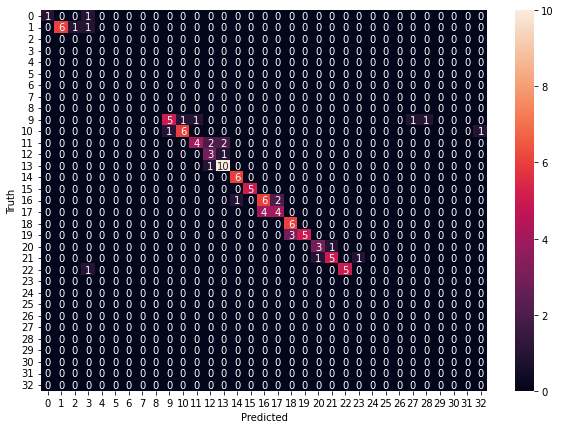

In [21]:
y_predicted = ocr_model.predict(test_images)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
     

### output

In [22]:
predictions = ocr_model.predict(test_images)

4/4 [==============================] - 0s 6ms/step


In [23]:
# array([10, 15,  9, 16, 13, 21, 13, 19, 21, 11, 17, 13,  0, 14, 17,  9, 13,
#        19, 13, 22, 10, 18, 13, 19, 13,  1,  1, 12, 21, 12, 12, 19, 18, 13,
#        13, 18, 17, 16, 21, 16, 11, 16,  9, 22, 16, 14,  9, 22, 11, 18, 13,
#        21, 15, 14, 15,  9, 13,  1, 17, 10,  1, 14, 19, 20, 20, 15, 10, 18,
#        17, 17,  1, 17, 14, 17, 10,  9, 16,  0, 10, 19, 20, 11, 21, 22, 21,
#        12,  9, 11,  1,  9, 14, 22, 10, 11,  1, 10, 19, 16,  9, 16, 19, 20,
#        22, 11, 18, 16, 15, 11,  1])


for v,l in enumerate(predictions[:5]):
    print(v,np.argmax(l))


0 10
1 15
2 10
3 16
4 13


In [24]:

for v,l in enumerate(predictions[:5]):
    print(v,class_names[np.argmax(l)])

0 11-zal
1 16-shin
2 11-zal
3 17-sad
4 14-zh


In [59]:
# test_img_path = "/content/plate-alpha-6/train/40-seven/11seven_jpg.rf.5d6f7eb9dcd497c1d3cdb09b8225d615.jpg"
# test_img = cv.imread(test_img_path, 0)
# test_img = np.expand_dims(test_img, axis=0)
# prediction1 = ocr_model.predict(test_img)

# class_names[np.argmax(prediction1[0])]

